In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

PARENT_DIR = '/home/groups/dpwall/briannac/SARS-CoV-2_structural_variations/'

SRA_metadata_table_file = PARENT_DIR + 'data/raw_reads/ncbi_sra_metadata.txt'

In [30]:
metadata = pd.read_csv(SRA_metadata_table_file)

/home/users/briannac/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (35,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,86,87,88,89,92,93,94,95,96,97,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,125,126,127,128,129,130,131,133,134,135,136,137,138,139,140,141,142,143,144) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
metadata = metadata[[(d.split('-')[0]=='2020') & ((int(d.split('-')[1] + d.split('-')[2].split('T')[0]))<604) for d in metadata['ReleaseDate']]]

In [19]:
metadata['Run'].to_csv(PARENT_DIR + 'sra_acc_list.txt', sep='\t', header=None, index=None)

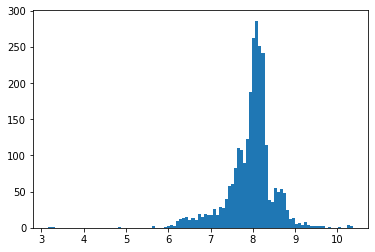

In [20]:
plt.hist(np.log10(metadata[metadata['Platform']=='ILLUMINA']['Bases']), bins=100)
plt.show()

In [21]:
# Filter to small-ish fastq files of illumina reads.
metadata = metadata[metadata['Bases']<10e7][['Run', 'Assay Type', 'Platform', 'LibraryLayout', 'Bases']]

In [22]:
done_files = glob.glob('/home/groups/dpwall/briannac/SARS-CoV-2_structural_variations/intermediate_files/raw_reads/*.cov.vcf')
done_files = [d.split('/')[-1].split('.')[0] for d in done_files]
metadata[[r not in done_files for r in metadata['Run']]].to_csv(PARENT_DIR + '/intermediate_files/raw_reads/ncbi_metadata_not_finished.tsv', sep='\t', index=False, header=None)

In [23]:
PARENT_DIR + '/intermediate_files/raw_reads/ncbi_metadata_not_finished.tsv'

'/home/groups/dpwall/briannac/SARS-CoV-2_structural_variations//intermediate_files/raw_reads/ncbi_metadata_not_finished.tsv'

In [24]:
metadata[[r not in done_files for r in metadata['Run']]]

,Run,Assay Type,Platform,LibraryLayout,Bases
5296,SRR11772027,RNA-Seq,ILLUMINA,SINGLE,44367361


In [25]:
%%bash
#cat /home/groups/dpwall/briannac/SARS-CoV-2_structural_variations/intermediate_files/raw_reads/*.cov.vcf > \
#/home/groups/dpwall/briannac/SARS-CoV-2_structural_variations/results/raw_reads/all.cov.vcf

Process is interrupted.


In [26]:
%%bash
#less /home/groups/dpwall/briannac/SARS-CoV-2_structural_variations/results/raw_reads/all.cov.vcf

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [36]:
fig_sras = ['SRR11577867','SRR11597222','SRR11621813','SRR11907574','SRR11857975']
metadata[[r in fig_sras for r in metadata['Run']]].to_csv(PARENT_DIR + '/intermediate_files/raw_reads/ncbi_reads_for_figs.tsv', sep='\t', index=False, header=None)